# Data Preparation

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os

# from dask import dataframe as dd

## Import Data

In [2]:
# Set data path for Kaggle
if os.environ.get('KAGGLE_KERNEL_RUN_TYPE', 'Localhost') == 'Interactive':
    loan_data_backup = pd.read_csv("/kaggle/input/loan-data-2007-2014/loan_data_2007_2014/loan_data_2007_2014.csv")
else:
    loan_data_backup = pd.read_csv('../data/loan_data_2007_2014.csv')

/tmp/ipykernel_31198/3054711046.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv('../data/loan_data_2007_2014.csv')


In [3]:
loan_data = loan_data_backup.copy()

## Explore Data

In [4]:
# loan_data

In [5]:
pd.options.display.max_columns = None

In [6]:
# loan_data #.compute()

In [7]:
# loan_data.head()

In [8]:
# loan_data.tail()

In [9]:
# loan_data.columns.values

In [10]:
# loan_data.info()

## General Preprocessing

### Preprocessing few continuous variables

In [11]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [12]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

In [13]:
loan_data["emp_length_int"].head()

0    10
1     0
2    10
3    10
4     1
Name: emp_length_int, dtype: object

In [14]:
type(loan_data['emp_length_int'][0])

str

In [15]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

# loan_data["emp_length_int"] = dd.to_numeric(loan_data['emp_length_int'])

In [16]:
type(loan_data['emp_length_int'][0])

numpy.float64

In [17]:
# loan_data['earliest_cr_line']

In [18]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [19]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
# (pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) #.compute()

In [21]:
def mnth_diff(x):
    end_date = pd.to_datetime('2017-12-01')
    year_diff = end_date.year - x.year 
    mnth_diff = end_date.month - x.month
    return year_diff*12 + mnth_diff + 1

In [22]:
# loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
loan_data['days_since_earliest_cr_line'] = pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']
loan_data['mths_since_earliest_cr_line'] = (pd.to_datetime('2017-12-01').to_period("M") - loan_data['earliest_cr_line_date'].dt.to_period("M")).apply(lambda x: x.n if pd.notnull(x) else x).fillna(np.nan).astype('Int64')
# loan_data["mths_since_earliest_cr_line_1"] = loan_data["earliest_cr_line_date"].apply(mnth_diff)
# loan_data['mths_since_earliest_cr_line'] = (pd.to_datetime('2017-12-01').to_period("M") - loan_data['earliest_cr_line_date'].dt.to_period("M")) #.apply(lambda x: x.n if pd.notnull(x) else x).fillna(np.nan).astype('Int64')
loan_data.loc[:, ["days_since_earliest_cr_line", "mths_since_earliest_cr_line"]].head() #, "mths_since_earliest_cr_line_1"]]

/tmp/ipykernel_31198/2719017738.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data['mths_since_earliest_cr_line'] = (pd.to_datetime('2017-12-01').to_period("M") - loan_data['earliest_cr_line_date'].dt.to_period("M")).apply(lambda x: x.n if pd.notnull(x) else x).fillna(np.nan).astype('Int64')


,days_since_earliest_cr_line,mths_since_earliest_cr_line
0,12022 days,395
1,6819 days,224
2,5874 days,193
3,7974 days,262
4,8005 days,263


In [23]:
loan_data['mths_since_earliest_cr_line'].describe()

count     466256.0
mean     239.48243
std      93.974829
min         -612.0
25%          183.0
50%          225.0
75%          285.0
max          587.0
Name: mths_since_earliest_cr_line, dtype: Float64

In [24]:
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537
1770,Sep-68,2068-09-01,-609
2799,Sep-64,2064-09-01,-561
3282,Sep-67,2067-09-01,-597
3359,Feb-65,2065-02-01,-566
...,...,...,...
464003,Jan-68,2068-01-01,-601
464260,Jul-66,2066-07-01,-583
465100,Oct-67,2067-10-01,-598
465500,Sep-67,2067-09-01,-597


In [25]:
loan_data["mths_since_earliest_cr_line"].max()

587

In [26]:
loan_data.loc[(loan_data['mths_since_earliest_cr_line'] < 0), "mths_since_earliest_cr_line"] = loan_data['mths_since_earliest_cr_line'].max()

In [27]:
# loan_data['mths_since_earliest_cr_line'].min()

In [28]:
loan_data["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [29]:
loan_data["term_int"] = loan_data["term"].str.strip().str.replace(" months", "").astype(int)

In [30]:
loan_data['term_int']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term_int, Length: 466285, dtype: int64

In [31]:
loan_data["issue_dt"] = pd.to_datetime(loan_data["issue_d"], format = "%b-%y")

In [32]:
loan_data["issue_dt"]

0        2011-12-01
1        2011-12-01
2        2011-12-01
3        2011-12-01
4        2011-12-01
            ...    
466280   2014-01-01
466281   2014-01-01
466282   2014-01-01
466283   2014-01-01
466284   2014-01-01
Name: issue_dt, Length: 466285, dtype: datetime64[ns]

In [33]:
loan_data["mths_since_issue_d"] = (pd.to_datetime('2017-12-01').to_period("M") - loan_data['issue_dt'].dt.to_period("M")).apply(lambda x: x.n if pd.notnull(x) else x).fillna(np.nan).astype('Int64')

In [34]:
loan_data.loc[:, ["mths_since_issue_d", "issue_d"]]

,mths_since_issue_d,issue_d
0,72,Dec-11
1,72,Dec-11
2,72,Dec-11
3,72,Dec-11
4,72,Dec-11
...,...,...
466280,47,Jan-14
466281,47,Jan-14
466282,47,Jan-14
466283,47,Jan-14


In [35]:
loan_data["emp_length"]

0         10+ years
1          < 1 year
2         10+ years
3         10+ years
4            1 year
            ...    
466280      4 years
466281    10+ years
466282      7 years
466283      3 years
466284    10+ years
Name: emp_length, Length: 466285, dtype: object

### Preprocessing few discrete variables

In [36]:
# loan_data.info()

In [37]:
pd.get_dummies(loan_data['grade'])

,A,B,C,D,E,F,G
0,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False
4,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
466280,False,False,True,False,False,False,False
466281,False,False,False,True,False,False,False
466282,False,False,False,True,False,False,False
466283,True,False,False,False,False,False,False


In [38]:
pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False
4,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
466280,False,False,True,False,False,False,False
466281,False,False,False,True,False,False,False
466282,False,False,False,True,False,False,False
466283,True,False,False,False,False,False,False


In [39]:
# After Weigth of Evidence analysis, will back to do k-1 dummy with specific reference (drop out) category
# Add drop_first = True, to get dummy with k-1 columns
# loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':', drop_first=True),
#                      pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':', drop_first=True),
#                      pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':', drop_first=True),
#                      pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':', drop_first=True),
#                      pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':', drop_first=True),
#                      pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':', drop_first=True),
#                      pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':', drop_first=True),
#                      pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':', drop_first=True)]


loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [40]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [41]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [42]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [43]:
# loan_data.columns.values

## Check null

In [44]:
pd.options.display.max_rows = None

In [45]:
# loan_data.isnull().sum()

In [46]:
loan_data.fillna({'total_rev_hi_lim': loan_data['funded_amnt']}, inplace = True)

In [47]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [48]:
loan_data["annual_inc"] = loan_data["annual_inc"].mean()

In [49]:
# pd.options.display.max_rows = None
# loan_data.columns.values

In [50]:
loan_data.fillna({'mths_since_earliest_cr_line':0,
                  'acc_now_delinq':0,
                  'total_acc':0,
                  'pub_rec':0,
                  'open_acc':0,
                  'inq_last_6mths':0,
                  'delinq_2yrs':0,
                  'emp_length_int':0}, inplace=True)

# PD model

## Data preparation

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [51]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [52]:
loan_data['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [53]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

loan_status
Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: count, dtype: float64

In [54]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                               'Does not meet the credit policy. Status:Charged Off',
                                                               'Late (31-120 days)']), 0, 1)

## Splitting data

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop(columns=["good_bad"]), loan_data["good_bad"], test_size=0.2, random_state=42)

In [57]:
loan_data_inputs_train.shape

(373028, 208)

In [58]:
loan_data_inputs_test.shape

(93257, 208)

In [59]:
loan_data_targets_train.shape

(373028,)

In [60]:
loan_data_targets_test.shape

(93257,)

In [61]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train

In [62]:
df_inputs_prepr["grade"].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [ ]:
df1 = pd.concat([df_inputs_prepr["grade"], df_targets_prepr], axis = "columns")
df1.head()

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,0
36159,C,0


In [64]:
gr_cnt = df1.groupby(["grade", "good_bad"], as_index=False).agg(cnt = ("grade", "count"))

In [65]:
tt_cnt = df1.groupby(["good_bad"], as_index=False).agg(tt_cnt = ("grade", "count"))

In [66]:
tt_cnt

,good_bad,tt_cnt
0,0,40778
1,1,332250


In [67]:
pv = (gr_cnt
 .merge(tt_cnt,on="good_bad",how="left")
 .assign(pct = lambda x : x["cnt"]/x["tt_cnt"])
 .replace({"good_bad": {0: "bad", 1:"good"}})
 .pivot(index="grade", columns="good_bad", values="pct")
 .assign(woe = lambda x : np.log(x["good"]/x["bad"]))
)

In [68]:
pv

good_bad,bad,good,woe
grade,,,
A,0.057090,0.172855,1.107830
B,0.212541,0.304178,0.358476
C,0.280813,0.267251,-0.049503
D,0.231792,0.156647,-0.391843
E,0.136642,0.069345,-0.678267
F,0.063417,0.023910,-0.975440
G,0.017706,0.005815,-1.113459


In [69]:
inf_val = pv.assign(inf_val = lambda x : (x["good"] - x["bad"]) * x["woe"])["inf_val"].sum()

In [70]:
inf_val

0.2886356129021057

In [71]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count()


,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


In [72]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.961044
1,B,0.921015
2,C,0.885770
3,D,0.846304
4,E,0.805257
5,F,0.754416
6,G,0.727958


In [73]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis="columns")
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = "columns")
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [74]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)

In [75]:
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


### Visualize WoE

In [76]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [77]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str)) # convert to numpy array since better work with seaborn
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

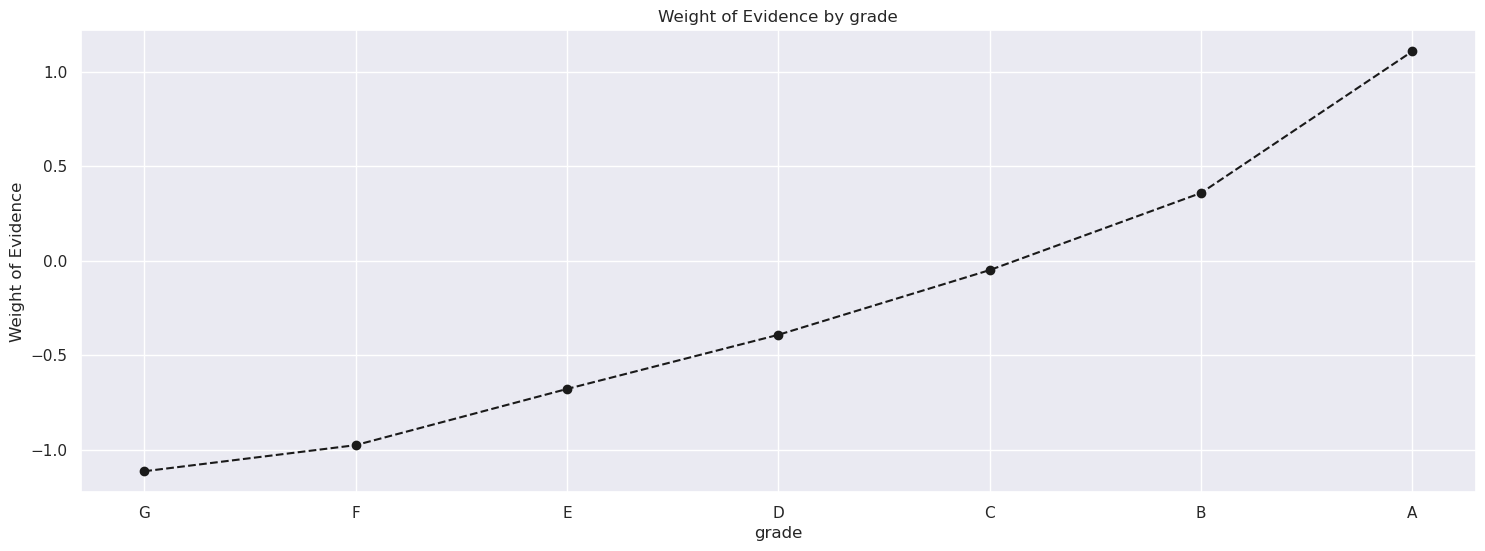

In [78]:
plot_by_woe(df_temp)

### Create dummy variable

In [79]:
df_inputs_prepr[df_inputs_prepr["home_ownership"]=="ANY"]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,days_since_earliest_cr_line,mths_since_earliest_cr_line,term_int,issue_dt,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
311334,311334,26170263,28642950,5000,5000,5000.0,36 months,11.67,165.29,B,B4,Office Administrative Assistant,5 years,ANY,73277.38147,Source Verified,Sep-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,757xx,TX,28.12,0.0,Dec-03,0.0,55.0,NaN,7.0,0.0,3319,43.1,12.0,f,0.0,0.0,5048.625,5048.62,5000.0,48.62,0.0,0.0,0.0,Oct-14,5048.63,NaN,Jan-16,0.0,55.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,152.0,130923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7700.0,NaN,NaN,NaN,5.0,2003-12-01,5114 days,168,36,2014-09-01,39,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,Fal

In [80]:
df_temp = woe_discrete(df_inputs_prepr, "home_ownership", df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,137,0.795620,0.000367,109.0,28.0,0.000328,0.000687,-0.738602,NaN,NaN,inf
1,NONE,40,0.850000,0.000107,34.0,6.0,0.000102,0.000147,-0.363144,0.054380,0.375458,inf
2,RENT,150599,0.873870,0.403720,131604.0,18995.0,0.396099,0.465815,-0.162123,0.023870,0.201021,inf
3,OWN,33295,0.892536,0.089256,29717.0,3578.0,0.089442,0.087743,0.019170,0.018666,0.181294,inf
4,MORTGAGE,188956,0.903835,0.506546,170785.0,18171.0,0.514026,0.445608,0.142834,0.011298,0.123663,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.096165,inf,inf


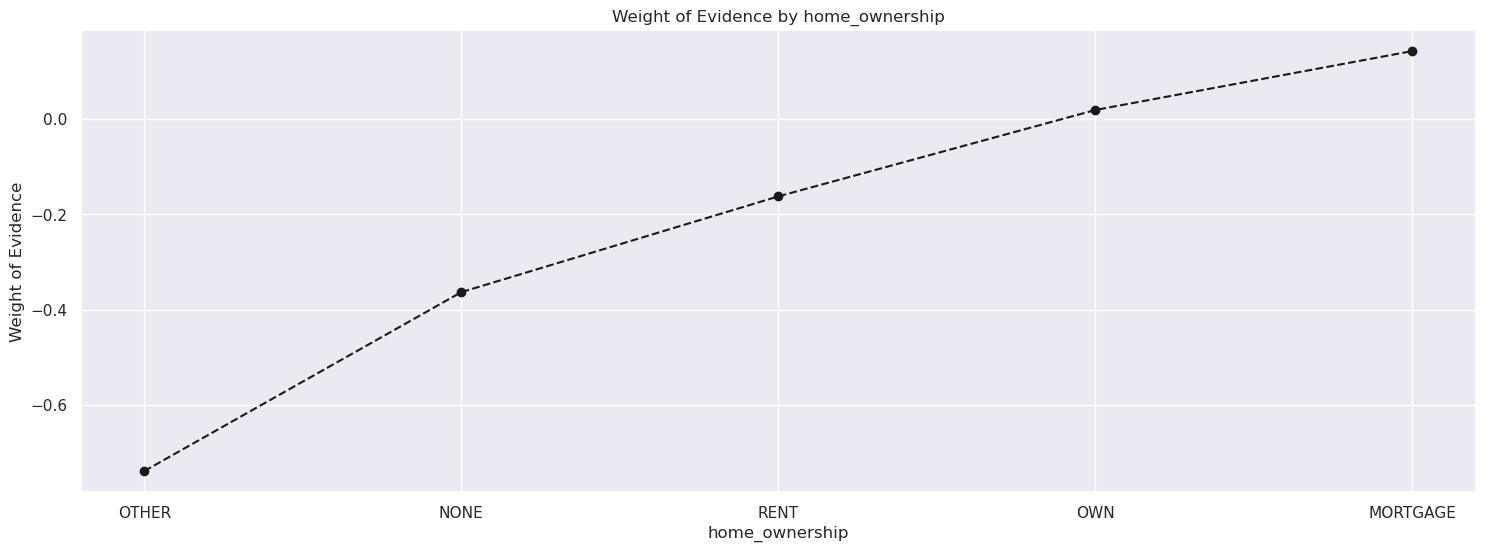

In [81]:
plot_by_woe(df_temp)

Combine "OTHER, "NONE", "RENT", "ANY" togather

In [82]:
df_inputs_prepr["home_ownership:RENT_OTHER_NONE_ANY"] = df_inputs_prepr["home_ownership:RENT"] + df_inputs_prepr["home_ownership:OTHER"] + df_inputs_prepr["home_ownership:NONE"] + df_inputs_prepr["home_ownership:ANY"]

In [83]:
df_inputs_prepr["addr_state"].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [84]:
df_temp = woe_discrete(df_inputs_prepr, "addr_state", df_targets_prepr)

In [85]:
df_temp.head()

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,13,0.461538,0.000035,6.0,7.0,0.000018,0.000172,-2.251896,NaN,NaN,inf
1,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000074,-0.893772,0.307692,1.358123,inf
2,NV,5221,0.864585,0.013996,4514.0,707.0,0.013586,0.017338,-0.243837,0.095355,0.649935,inf
3,FL,25211,0.875808,0.067585,22080.0,3131.0,0.066456,0.076782,-0.144425,0.011223,0.099411,inf
4,HI,2001,0.877061,0.005364,1755.0,246.0,0.005282,0.006033,-0.132852,0.001253,0.011573,inf


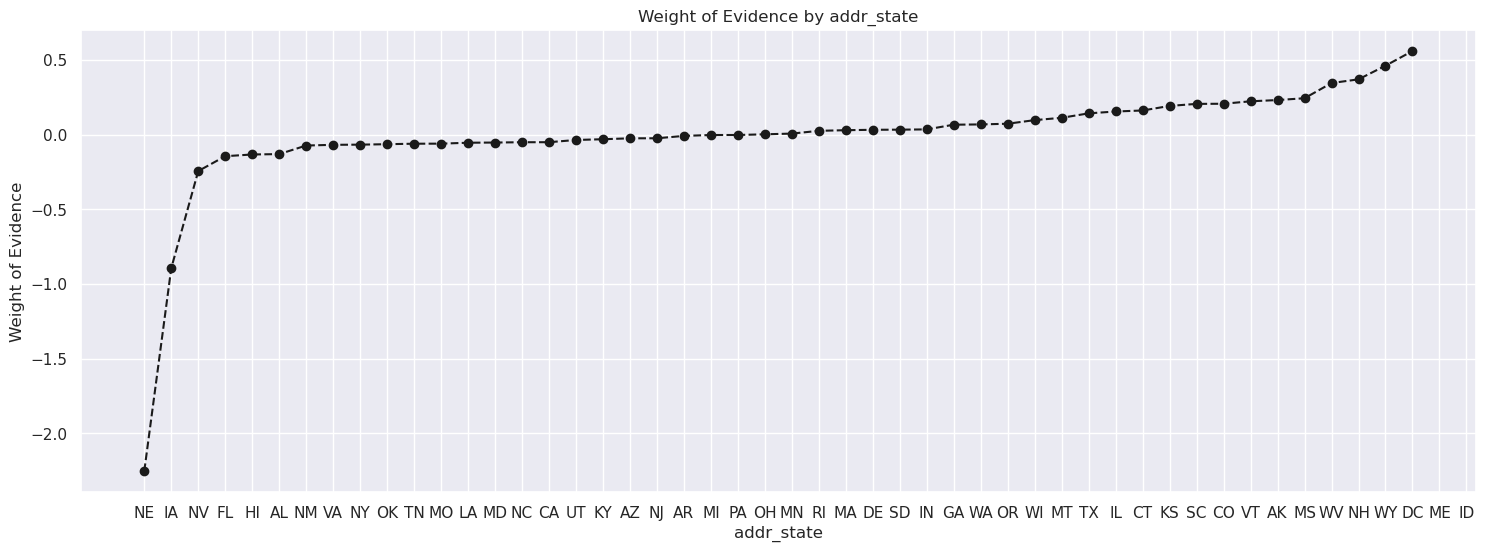

In [86]:
plot_by_woe(df_temp)

In [87]:
# Add North Dakota state (ND) to support future data with this state

if ['addr_statad:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr["addr_state:ND"] = 0

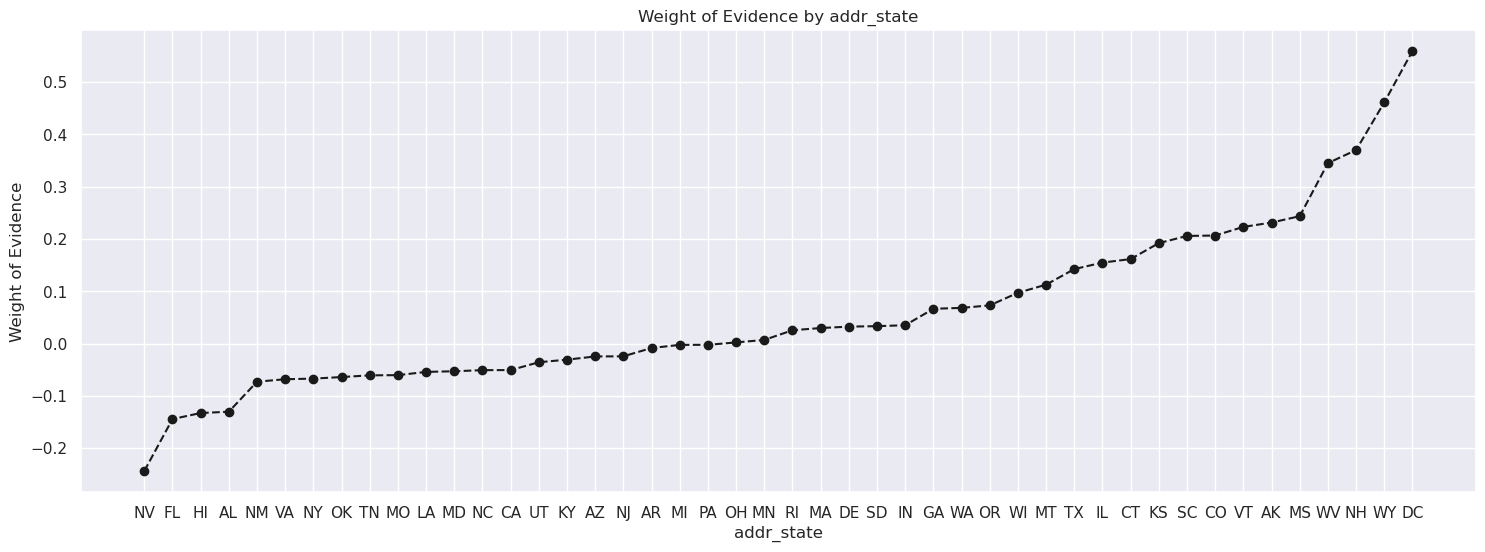

In [88]:
plot_by_woe(df_temp.iloc[2:-2, :])

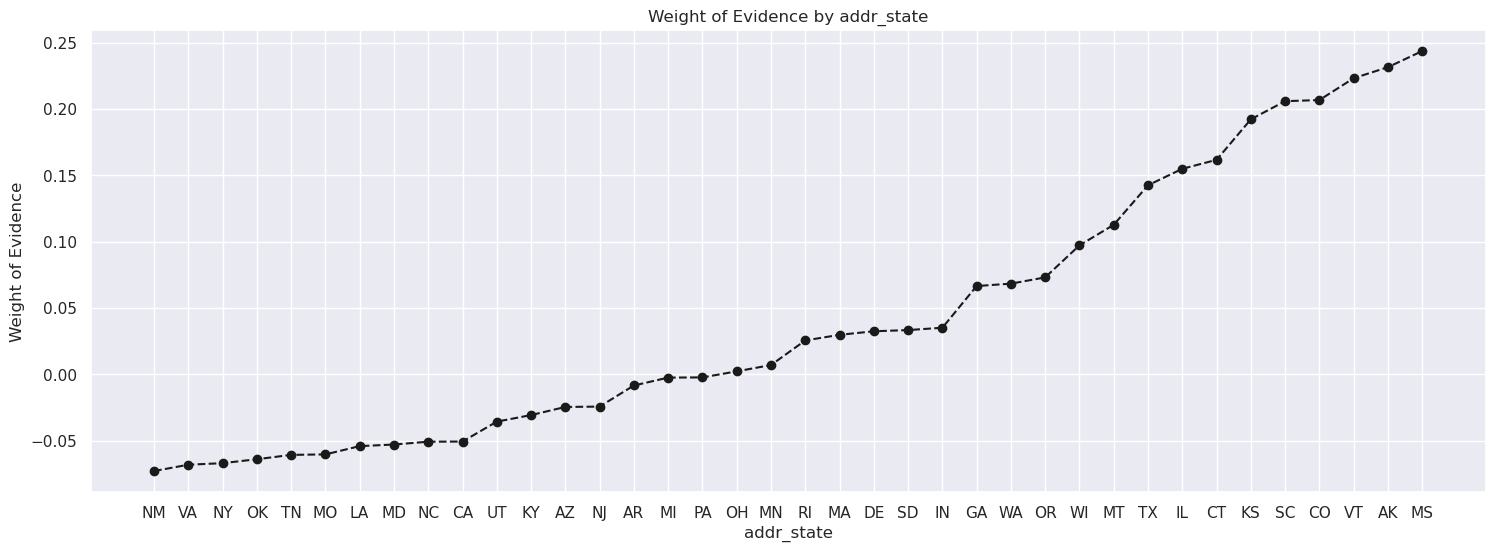

In [89]:
plot_by_woe(df_temp.iloc[6: -6, :])

In [90]:
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                                         df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                                         df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                         df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

### Homework : Categorize `verification_status`, `purpose`, `initial_list_status`

In [91]:
df_temp = woe_discrete(df_inputs_prepr, "verification_status", df_targets_prepr)

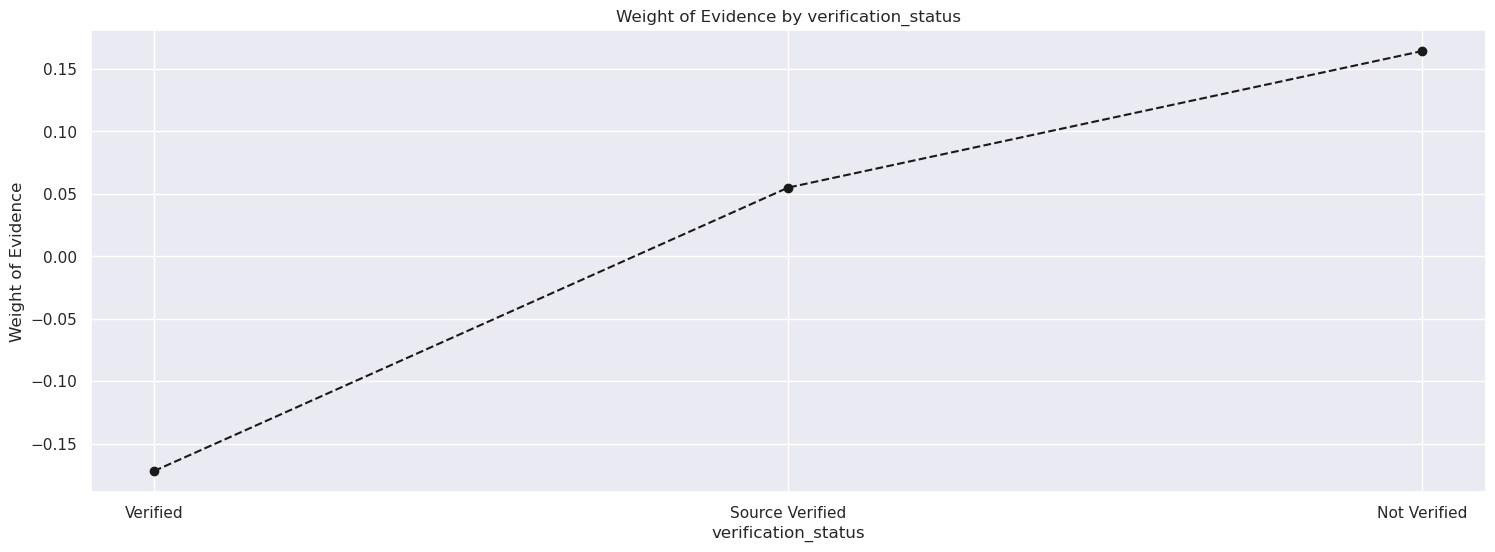

In [92]:
plot_by_woe(df_temp)

In [93]:
df_temp = woe_discrete(df_inputs_prepr, "purpose", df_targets_prepr)

In [94]:
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,5582,0.786098,0.014964,4388.0,1194.0,0.013207,0.029280,-0.796180,NaN,NaN,0.035418
1,educational,333,0.801802,0.000893,267.0,66.0,0.000804,0.001619,-0.700151,0.015704,0.096029,0.035418
2,moving,2392,0.839465,0.006412,2008.0,384.0,0.006044,0.009417,-0.443493,0.037663,0.256658,0.035418
3,house,1830,0.860109,0.004906,1574.0,256.0,0.004737,0.006278,-0.281547,0.020644,0.161946,0.035418
4,other,18884,0.862264,0.050624,16283.0,2601.0,0.049008,0.063784,-0.263519,0.002155,0.018028,0.035418
5,renewable_energy,281,0.864769,0.000753,243.0,38.0,0.000731,0.000932,-0.242270,0.002504,0.021250,0.035418
6,medical,3684,0.868350,0.009876,3199.0,485.0,0.009628,0.011894,-0.211300,0.003581,0.030969,0.035418
7,wedding,1887,0.881823,0.005059,1664.0,223.0,0.005008,0.005469,-0.087937,0.013473,0.123363,0.035418
8,vacation,1991,0.882471,0.005337,1757.0,234.0,0.005288,0.005738,-0.081703,0.000648,0.006234,0.035418
9,debt_consolidation,219183,0.886884,0.587578,194390.0,24793.0,0.585071,0.607999,-0.038440,0.004413,0.043263,0.035418


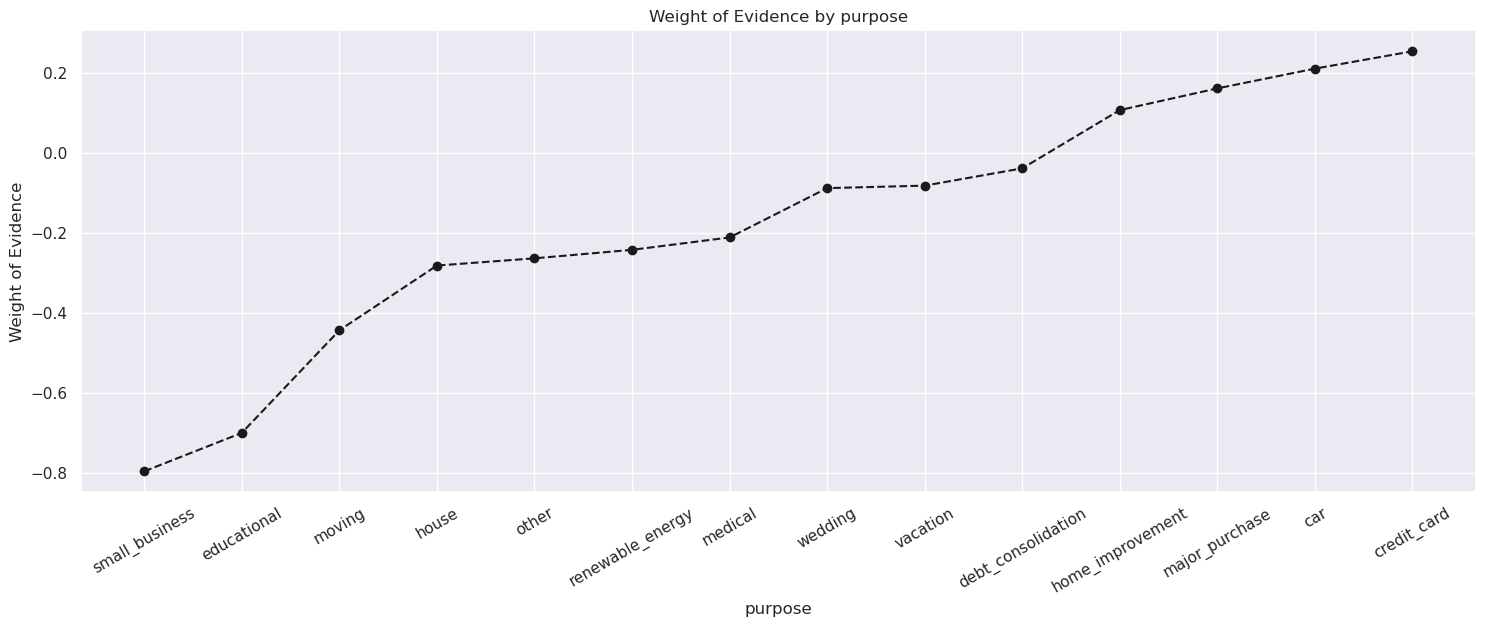

In [95]:
plot_by_woe(df_temp, rotation_of_x_axis_labels=30)

### Categorizing continuous variable

In [96]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis="columns")
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = "columns")
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    # df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [97]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "term_int", df_targets_prepr)

In [98]:
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270419,0.902995,0.724929,244187.0,26232.0,0.73495,0.643288,0.133209,NaN,NaN,0.039434
1,60,102609,0.858239,0.275071,88063.0,14546.0,0.26505,0.356712,-0.297009,0.044756,0.430218,0.039434


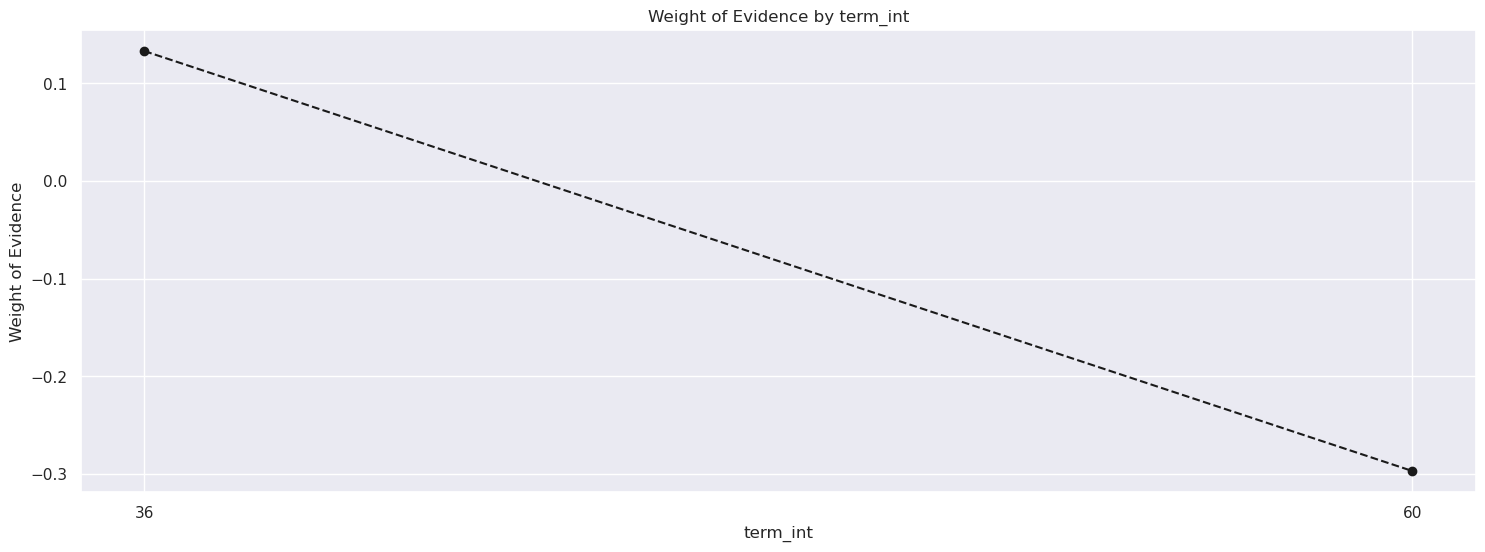

In [99]:
plot_by_woe(df_temp)

In [100]:
df_inputs_prepr["term:36"] = np.where(df_inputs_prepr["term_int"] == 36, 1, 0)
df_inputs_prepr["term:60"] = np.where(df_inputs_prepr["term_int"] == 60, 1, 0)

In [101]:
df_inputs_prepr["emp_length_int"].unique()

array([ 3.,  6., 10.,  7.,  5.,  0.,  2.,  9.,  1.,  8.,  4.])

In [102]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "emp_length_int", df_targets_prepr)

In [103]:
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,45720,0.876400,0.122565,40069.0,5651.0,0.120599,0.138580,-0.138975,NaN,NaN,0.006506
1,1.0,23654,0.886996,0.063411,20981.0,2673.0,0.063148,0.065550,-0.037329,0.010596,0.101645,0.006506
2,2.0,33078,0.890955,0.088674,29471.0,3607.0,0.088701,0.088455,0.002785,0.003959,0.040114,0.006506
3,3.0,29205,0.890772,0.078292,26015.0,3190.0,0.078299,0.078228,0.000907,0.000183,0.001878,0.006506
4,4.0,22468,0.890644,0.060231,20011.0,2457.0,0.060229,0.060253,-0.000404,0.000128,0.001311,0.006506
5,5.0,24602,0.884725,0.065952,21766.0,2836.0,0.065511,0.069547,-0.059790,0.005920,0.059387,0.006506
6,6.0,20887,0.883899,0.055993,18462.0,2425.0,0.055567,0.059468,-0.067862,0.000826,0.008071,0.006506
7,7.0,21049,0.887453,0.056427,18680.0,2369.0,0.056223,0.058095,-0.032759,0.003554,0.035102,0.006506
8,8.0,17853,0.889878,0.047860,15887.0,1966.0,0.047816,0.048212,-0.008245,0.002425,0.024515,0.006506
9,9.0,14267,0.886662,0.038246,12650.0,1617.0,0.038074,0.039654,-0.040660,0.003217,0.032416,0.006506


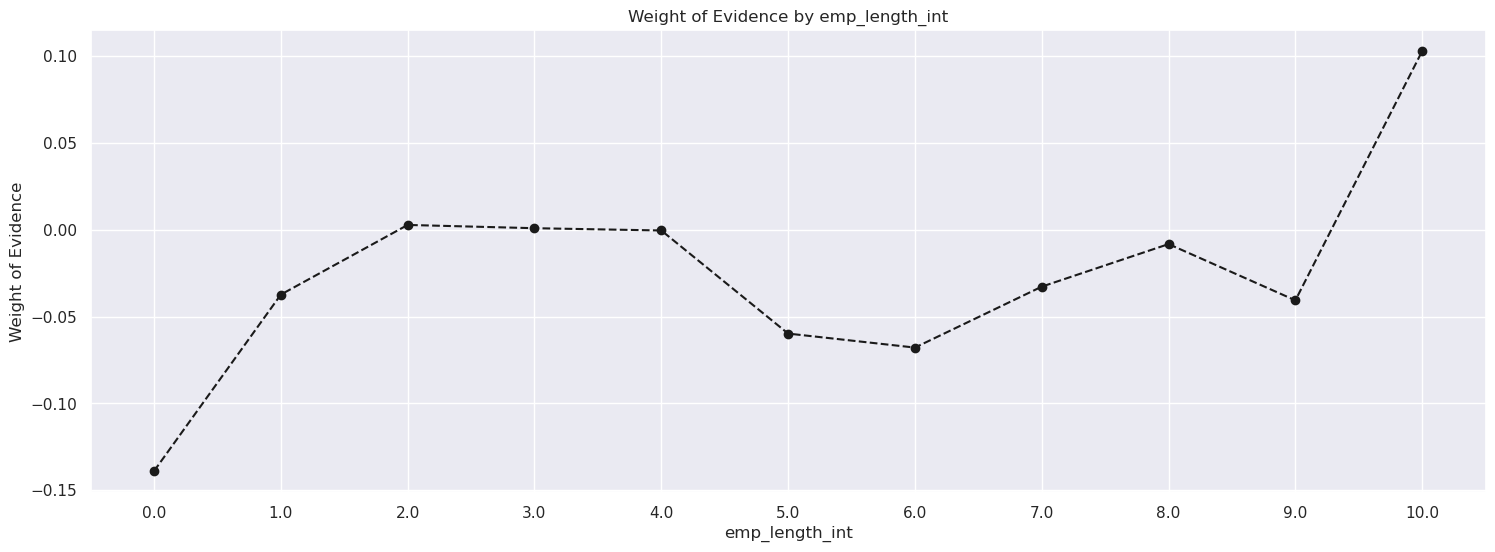

In [104]:
plot_by_woe(df_temp)

In [105]:
list(range(2,5))

[2, 3, 4]

In [106]:
df_inputs_prepr["emp_length:0"] = np.where(df_inputs_prepr["emp_length_int"].isin([0]), 1, 0)
df_inputs_prepr["emp_length:1"] = np.where(df_inputs_prepr["emp_length_int"].isin([1]), 1, 0)
df_inputs_prepr["emp_length:2-4"] = np.where(df_inputs_prepr["emp_length_int"].isin(list(range(2, 5))), 1, 0)
df_inputs_prepr["emp_length:5-6"] = np.where(df_inputs_prepr["emp_length_int"].isin(list(range(5, 7))), 1, 0)
df_inputs_prepr["emp_length:7-9"] = np.where(df_inputs_prepr["emp_length_int"].isin(list(range(7, 10))), 1, 0)
df_inputs_prepr["emp_length:10"] = np.where(df_inputs_prepr["emp_length_int"].isin([10]), 1, 0)

In [107]:
df_inputs_prepr["mths_since_issue_d"].unique()

<IntegerArray>
[ 45,  64,  54,  44, 101,  37,  91,  53,  42,  57,  58,  43,  40,  51,  59,
 113,  50,  62,  49,  47,  48,  41,  38,  66,  69,  87,  46,  76,  63,  39,
  61,  89,  65,  56,  79,  68,  52,  60,  73,  74,  70,  88,  81,  82,  55,
 103,  83,  72,  85,  36,  71,  92,  77,  67,  84,  86,  90, 116,  93,  95,
  78,  75,  80,  96,  94,  98, 104, 125, 105, 118, 110, 119, 114,  97, 102,
 106, 100, 122, 121, 108, 117, 120, 124,  99, 115, 112, 109, 123, 107, 126,
 111]
Length: 91, dtype: Int64

In [108]:
df_inputs_prepr["mths_since_issue_d_factor"] = pd.cut(df_inputs_prepr["mths_since_issue_d"], 50)

In [109]:
df_inputs_prepr["mths_since_issue_d_factor"].head()

427211      (43.2, 45.0]
206088      (63.0, 64.8]
136020      (52.2, 54.0]
412305      (43.2, 45.0]
36159     (100.8, 102.6]
Name: mths_since_issue_d_factor, dtype: category
Categories (50, interval[float64, right]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [110]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "mths_since_issue_d_factor", df_targets_prepr)

/tmp/ipykernel_31198/2353512927.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_31198/2353512927.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = "columns")


In [ ]:
df_temp.head()

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",28170,0.942244,0.075517,26543.0,1627.0,0.079889,0.039899,0.694283,NaN,NaN,0.113186
1,"(37.8, 39.6]",39636,0.928424,0.106255,36799.0,2837.0,0.110757,0.069572,0.464979,0.013820,0.229305,0.113186
2,"(39.6, 41.4]",38614,0.917284,0.103515,35420.0,3194.0,0.106606,0.078327,0.308258,0.011140,0.156721,0.113186
3,"(41.4, 43.2]",29038,0.908603,0.077844,26384.0,2654.0,0.079410,0.065084,0.198945,0.008681,0.109313,0.113186
4,"(43.2, 45.0]",28367,0.901787,0.076045,25581.0,2786.0,0.076993,0.068321,0.119498,0.006815,0.079447,0.113186


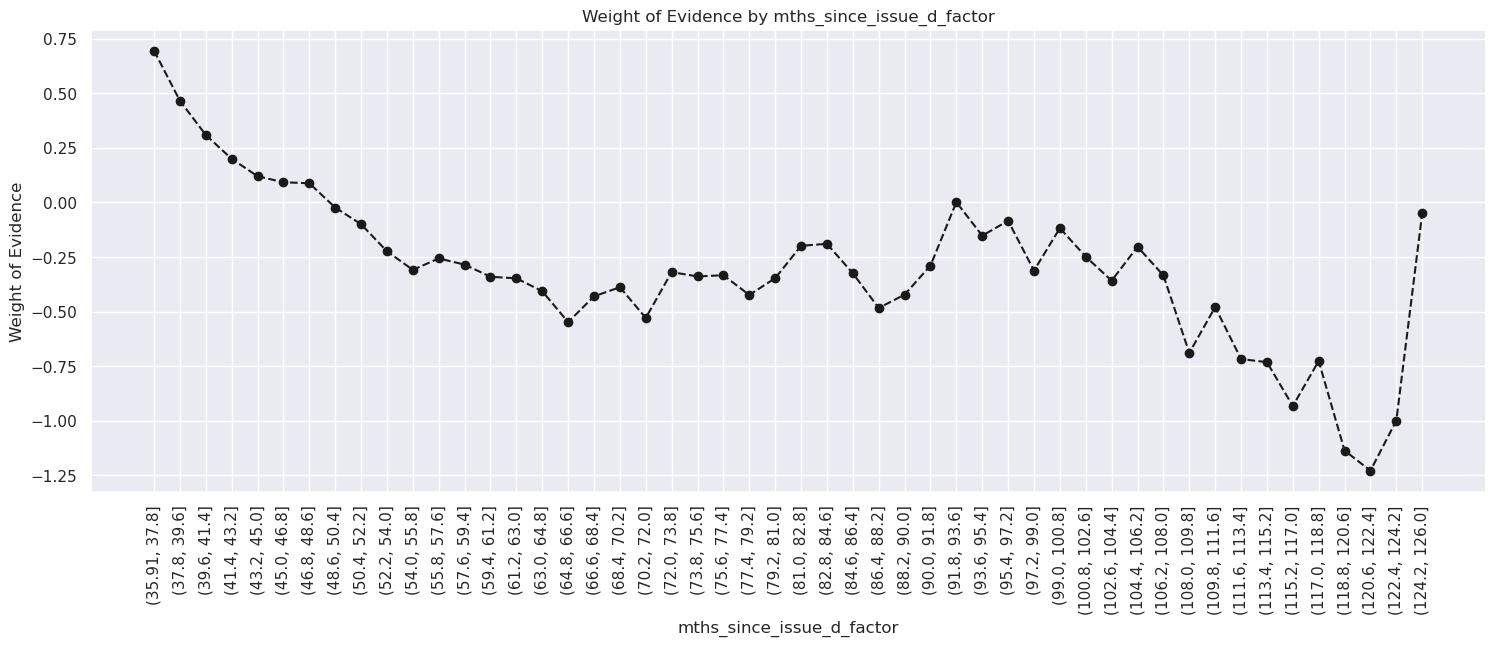

In [112]:
plot_by_woe(df_temp, rotation_of_x_axis_labels=90)

In [113]:
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [114]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [115]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

/tmp/ipykernel_31198/2353512927.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_31198/2353512927.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = "columns")


,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",785,0.961783,0.002104,755.0,30.0,0.002272,0.000736,1.127775,NaN,NaN,0.343349
1,"(5.833, 6.246]",8459,0.980376,0.022677,8293.0,166.0,0.024960,0.004071,1.813434,0.018592,0.685659,0.343349
2,"(6.246, 6.658]",7826,0.971505,0.020980,7603.0,223.0,0.022883,0.005469,1.431381,0.008871,0.382053,0.343349
3,"(6.658, 7.071]",1816,0.973018,0.004868,1767.0,49.0,0.005318,0.001202,1.487473,0.001512,0.056092,0.343349
4,"(7.071, 7.484]",3143,0.976456,0.008426,3069.0,74.0,0.009237,0.001815,1.627297,0.003438,0.139824,0.343349
5,"(7.484, 7.897]",12581,0.962324,0.033727,12107.0,474.0,0.036439,0.011624,1.142587,0.014131,0.484710,0.343349
6,"(7.897, 8.31]",9687,0.949314,0.025969,9196.0,491.0,0.027678,0.012041,0.832335,0.013011,0.310252,0.343349
7,"(8.31, 8.722]",6594,0.965271,0.017677,6365.0,229.0,0.019157,0.005616,1.227103,0.015958,0.394768,0.343349
8,"(8.722, 9.135]",9539,0.937415,0.025572,8942.0,597.0,0.026913,0.014640,0.608852,0.027857,0.618250,0.343349
9,"(9.135, 9.548]",6681,0.963928,0.017910,6440.0,241.0,0.019383,0.005910,1.187742,0.026513,0.578889,0.343349


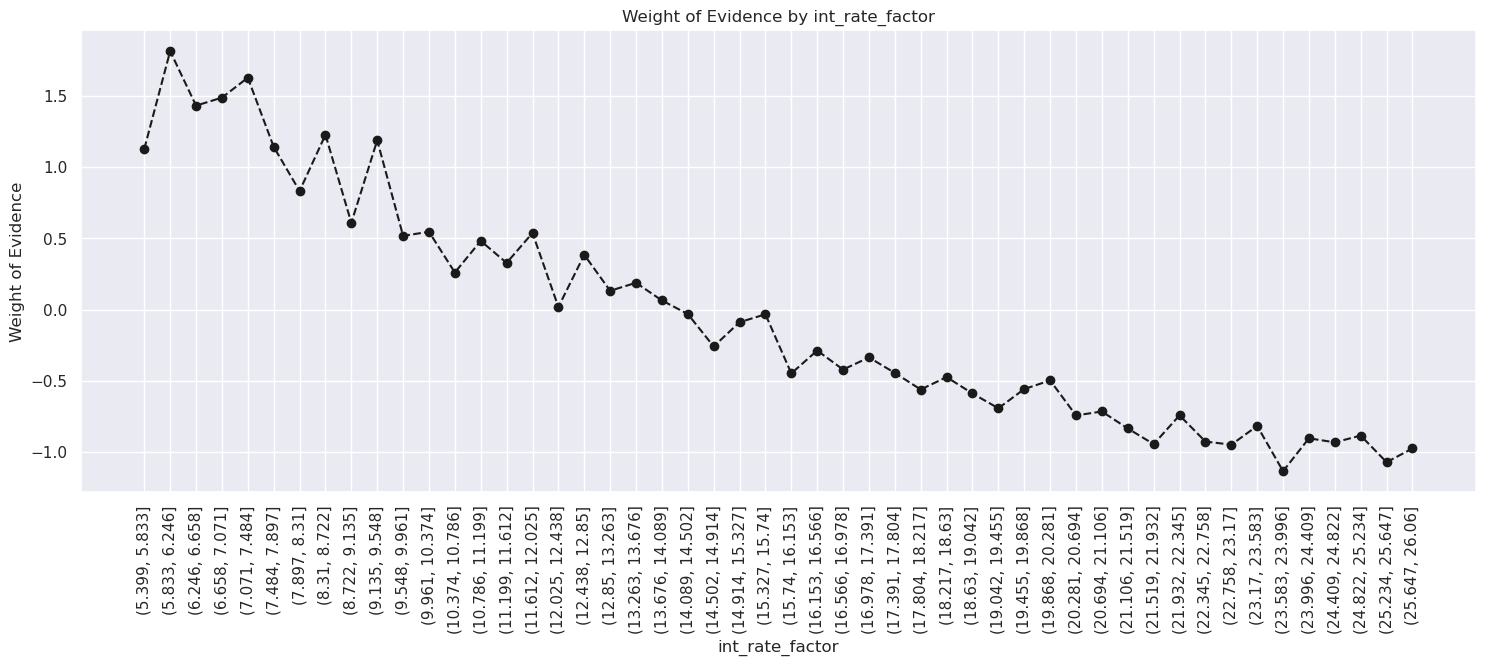

In [116]:
plot_by_woe(df_temp, 90)

In [117]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [118]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

/tmp/ipykernel_31198/2353512927.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_31198/2353512927.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = "columns")


,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",1224,0.905229,0.003281,1108.0,116.0,0.003335,0.002845,0.158977,NaN,NaN,0.014139
1,"(1190.0, 1880.0]",3028,0.903897,0.008117,2737.0,291.0,0.008238,0.007136,0.143549,0.001332,0.015427,0.014139
2,"(1880.0, 2570.0]",6018,0.893819,0.016133,5379.0,639.0,0.016190,0.015670,0.032608,0.010078,0.110941,0.014139
3,"(2570.0, 3260.0]",7248,0.889073,0.019430,6444.0,804.0,0.019395,0.019717,-0.016440,0.004746,0.049048,0.014139
4,"(3260.0, 3950.0]",4751,0.891602,0.012736,4236.0,515.0,0.012749,0.012629,0.009463,0.002529,0.025902,0.014139
5,"(3950.0, 4640.0]",9023,0.890945,0.024189,8039.0,984.0,0.024196,0.024131,0.002689,0.000656,0.006774,0.014139
6,"(4640.0, 5330.0]",15903,0.892159,0.042632,14188.0,1715.0,0.042703,0.042057,0.015238,0.001213,0.012549,0.014139
7,"(5330.0, 6020.0]",17236,0.906069,0.046206,15617.0,1619.0,0.047004,0.039703,0.168806,0.013910,0.153568,0.014139
8,"(6020.0, 6710.0]",6914,0.887619,0.018535,6137.0,777.0,0.018471,0.019054,-0.031094,0.018449,0.199900,0.014139
9,"(6710.0, 7400.0]",11806,0.898018,0.031649,10602.0,1204.0,0.031910,0.029526,0.077648,0.010399,0.108742,0.014139


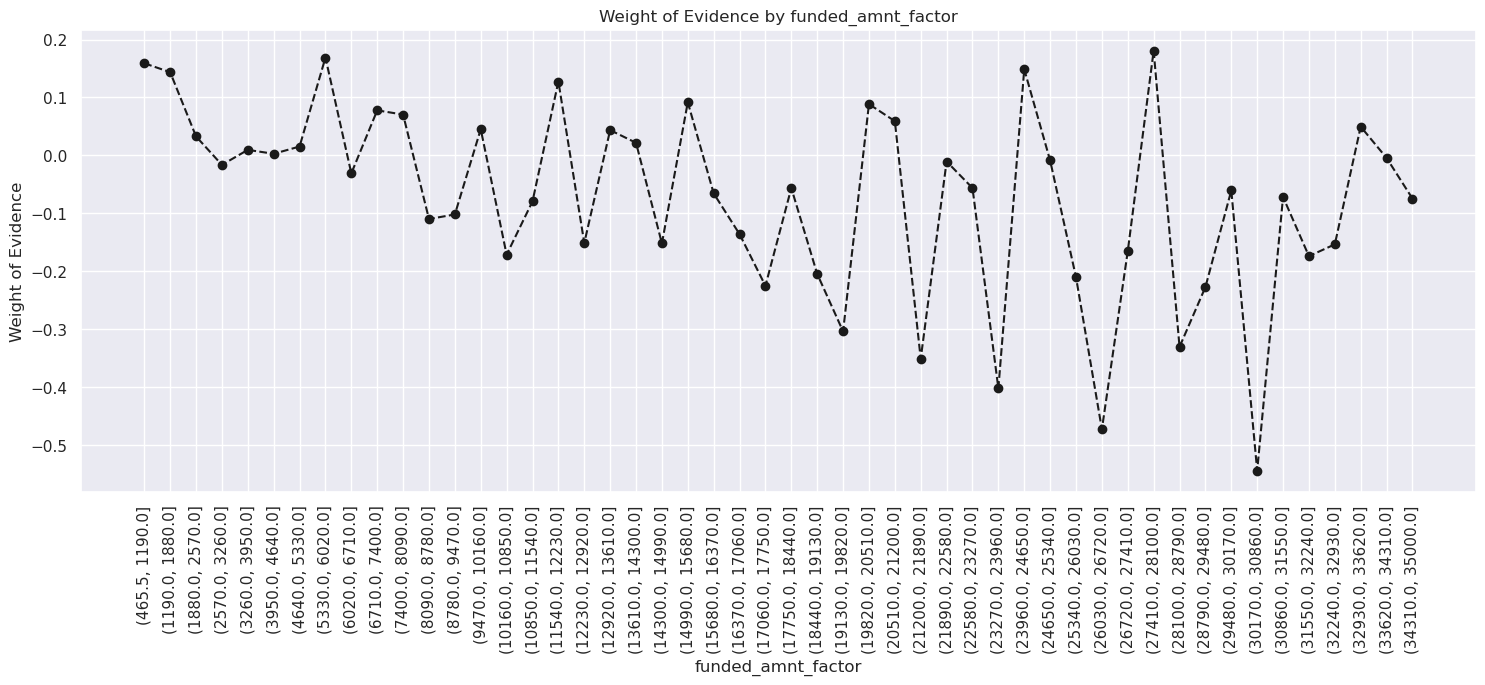

In [119]:
plot_by_woe(df_temp, 90)

WoE show no tread and jumpy across all the variable -> this features could not give strong evidence , esp. from IV = 0.014 = no evidence

#### Homework

In [120]:
df_inputs_prepr["mths_since_earliest_cr_line_factor"] = pd.cut(df_inputs_prepr["mths_since_earliest_cr_line"], 40)
df_temp = woe_ordered_continuous(df_inputs_prepr, "mths_since_earliest_cr_line_factor", df_targets_prepr)
df_temp
# mths_since_earliest_cr_line low iv (0.016) could ignore

/tmp/ipykernel_31198/2353512927.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_31198/2353512927.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = "columns")


,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.587, 14.675]",24,0.875000,0.000064,21.0,3.0,0.000063,0.000074,-0.151835,NaN,NaN,inf
1,"(14.675, 29.35]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(29.35, 44.025]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(44.025, 58.7]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(58.7, 73.375]",2,1.000000,0.000005,2.0,0.0,0.000006,0.000000,inf,NaN,NaN,inf
5,"(73.375, 88.05]",1813,0.898511,0.004860,1629.0,184.0,0.004903,0.004512,0.083041,0.101489,inf,inf
6,"(88.05, 102.725]",2995,0.859766,0.008029,2575.0,420.0,0.007750,0.010300,-0.284395,0.038744,0.367436,inf
7,"(102.725, 117.4]",5750,0.869739,0.015414,5001.0,749.0,0.015052,0.018368,-0.199091,0.009973,0.085304,inf
8,"(117.4, 132.075]",11900,0.861513,0.031901,10252.0,1648.0,0.030856,0.040414,-0.269835,0.008227,0.070744,inf
9,"(132.075, 146.75]",15528,0.871651,0.041627,13535.0,1993.0,0.040737,0.048874,-0.182107,0.010139,0.087728,inf


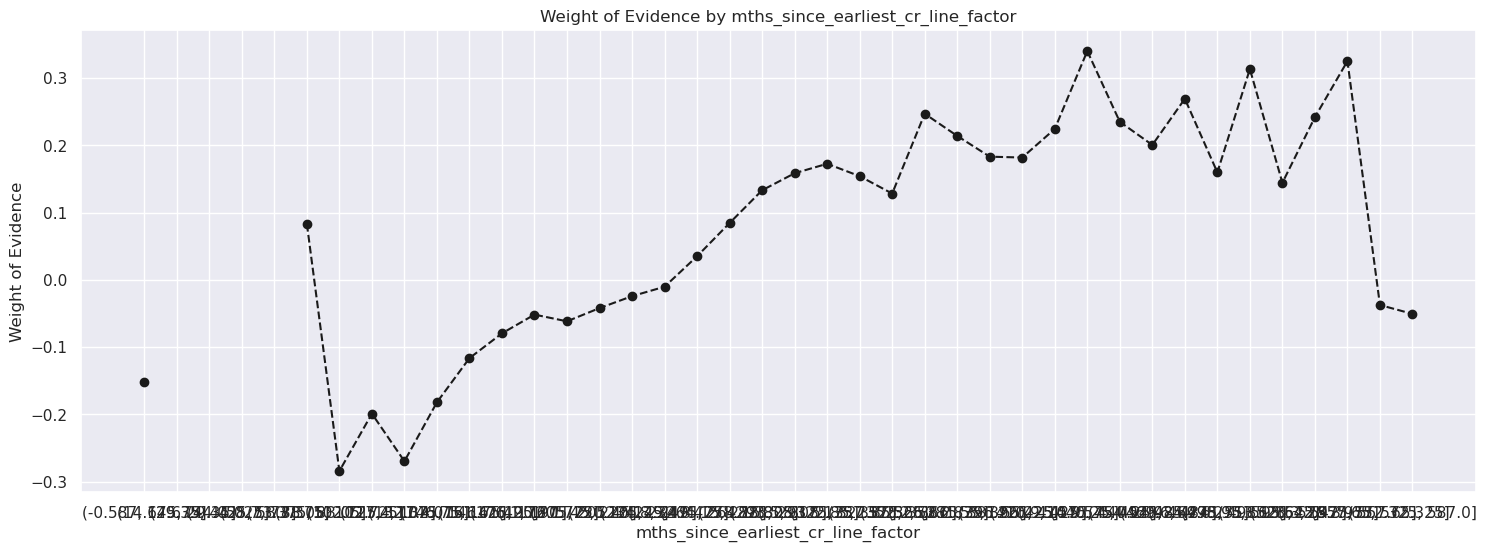

In [121]:
plot_by_woe(df_temp)

In [122]:
df_inputs_prepr["delinq_2yrs"].unique()

array([ 0.,  1.,  4.,  2.,  5.,  3.,  6.,  9.,  8.,  7., 11., 24., 10.,
       12., 18., 13., 14., 17., 19., 15., 16., 22., 21., 29.])

In [123]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "delinq_2yrs", df_targets_prepr)
df_temp

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,306417,0.890499,0.821432,272864.0,33553.0,0.821261,0.822821,-0.001898,NaN,NaN,inf
1,1.0,44927,0.893249,0.120439,40131.0,4796.0,0.120786,0.117612,0.026622,0.002750,0.028520,inf
2,2.0,13118,0.889007,0.035166,11662.0,1456.0,0.035100,0.035706,-0.017102,0.004242,0.043724,inf
3,3.0,4550,0.883297,0.012197,4019.0,531.0,0.012096,0.013022,-0.073719,0.005711,0.056616,inf
4,4.0,1868,0.898822,0.005008,1679.0,189.0,0.005053,0.004635,0.086462,0.015526,0.160180,inf
5,5.0,966,0.881988,0.002590,852.0,114.0,0.002564,0.002796,-0.086357,0.016835,0.172819,inf
6,6.0,501,0.902196,0.001343,452.0,49.0,0.001360,0.001202,0.124117,0.020208,0.210474,inf
7,7.0,279,0.860215,0.000748,240.0,39.0,0.000722,0.000956,-0.280668,0.041981,0.404785,inf
8,8.0,148,0.905405,0.000397,134.0,14.0,0.000403,0.000343,0.161037,0.045190,0.441705,inf
9,9.0,89,0.887640,0.000239,79.0,10.0,0.000238,0.000245,-0.030882,0.017765,0.191920,inf


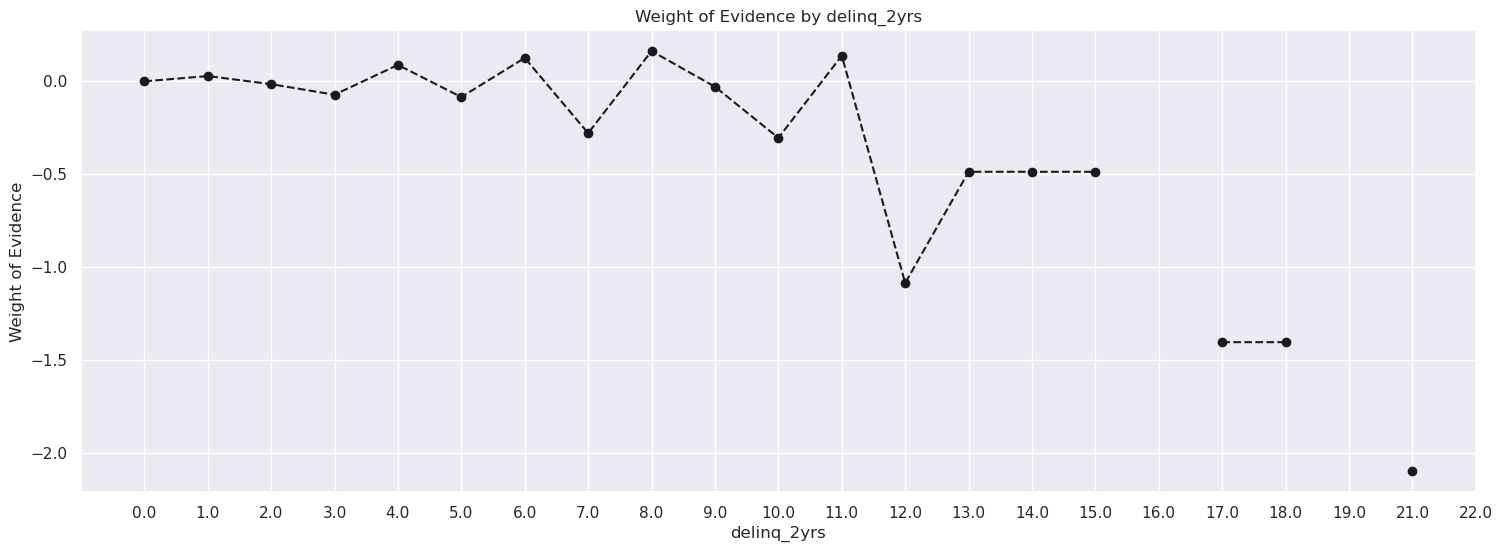

In [124]:
plot_by_woe(df_temp)

In [125]:
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [126]:
df_inputs_prepr["inq_last_6mths"].unique()

array([ 1.,  2.,  3.,  0.,  4.,  5.,  6.,  7.,  8.,  9., 12., 28., 11.,
       15., 14., 13., 10., 20., 16., 24., 17., 33., 18., 31., 19., 25.,
       27., 32.])

In [127]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "inq_last_6mths", df_targets_prepr)
df_temp

/home/danny/miniconda3/envs/dask/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,193232,0.908395,0.518009,175531.0,17701.0,0.528310,0.434082,0.196450,NaN,NaN,inf
1,1.0,104163,0.884950,0.279236,92179.0,11984.0,0.277439,0.293884,-0.057585,0.023446,0.254035,inf
2,2.0,46214,0.864197,0.123889,39938.0,6276.0,0.120205,0.153907,-0.247150,0.020753,0.189564,inf
3,3.0,20040,0.839671,0.053723,16827.0,3213.0,0.050646,0.078792,-0.441965,0.024526,0.194816,inf
4,4.0,5810,0.848365,0.015575,4929.0,881.0,0.014835,0.021605,-0.375911,0.008694,0.066054,inf
5,5.0,2217,0.824989,0.005943,1829.0,388.0,0.005505,0.009515,-0.547226,0.023376,0.171314,inf
6,6.0,977,0.788127,0.002619,770.0,207.0,0.002318,0.005076,-0.784073,0.036862,0.236848,inf
7,7.0,159,0.679245,0.000426,108.0,51.0,0.000325,0.001251,-1.347439,0.108882,0.563366,inf
8,8.0,101,0.643564,0.000271,65.0,36.0,0.000196,0.000883,-1.506877,0.035681,0.159437,inf
9,9.0,43,0.674419,0.000115,29.0,14.0,0.000087,0.000343,-1.369506,0.030854,0.137370,inf


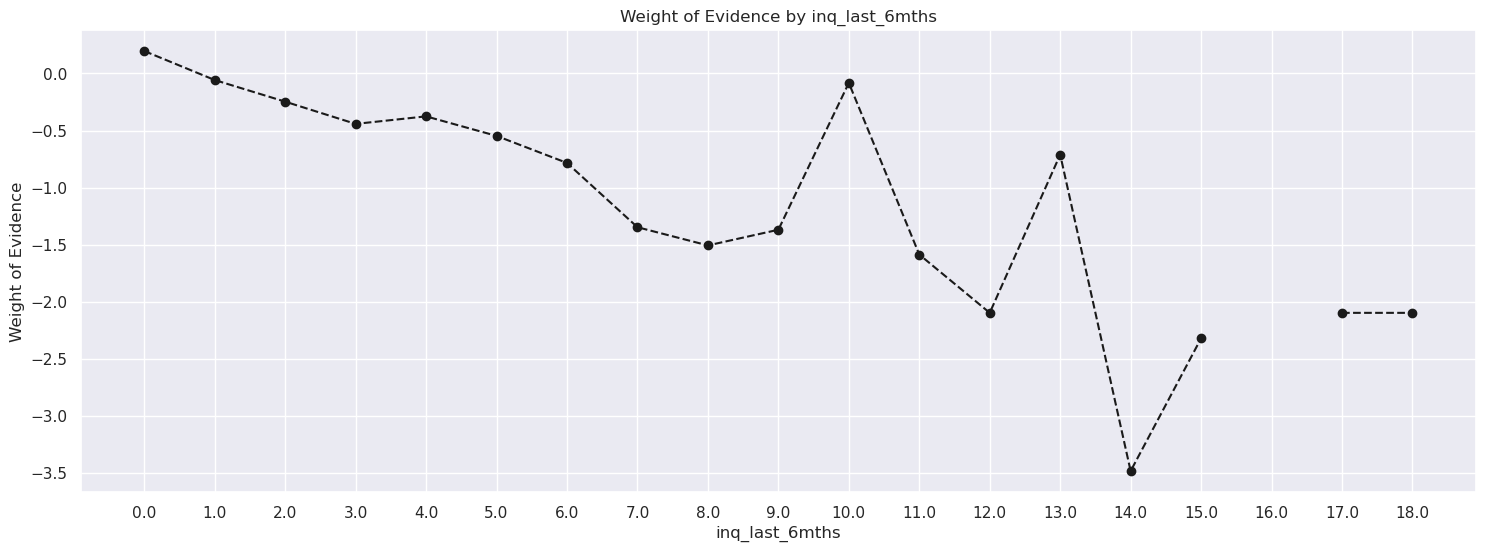

In [128]:
plot_by_woe(df_temp)

In [129]:
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [130]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "open_acc", df_targets_prepr)
df_temp

/home/danny/miniconda3/envs/dask/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,29,0.758621,0.000078,22.0,7.0,0.000066,0.000172,-0.952613,NaN,NaN,inf
1,1.0,110,0.872727,0.000295,96.0,14.0,0.000289,0.000343,-0.172454,0.114107,0.780159,inf
2,2.0,1456,0.845467,0.003903,1231.0,225.0,0.003705,0.005518,-0.398263,0.027260,0.225809,inf
3,3.0,4378,0.873687,0.011736,3825.0,553.0,0.011512,0.013561,-0.163789,0.028220,0.234474,inf
4,4.0,10028,0.891504,0.026883,8940.0,1088.0,0.026907,0.026681,0.008449,0.017817,0.172239,inf
5,5.0,17141,0.891255,0.045951,15277.0,1864.0,0.045980,0.045711,0.005879,0.000249,0.002571,inf
6,6.0,24621,0.892368,0.066003,21971.0,2650.0,0.066128,0.064986,0.017419,0.001113,0.011540,inf
7,7.0,30169,0.891544,0.080876,26897.0,3272.0,0.080954,0.080239,0.008868,0.000824,0.008550,inf
8,8.0,33579,0.891033,0.090017,29920.0,3659.0,0.090053,0.089730,0.003592,0.000511,0.005276,inf
9,9.0,35251,0.889195,0.094500,31345.0,3906.0,0.094342,0.095787,-0.015204,0.001838,0.018796,inf


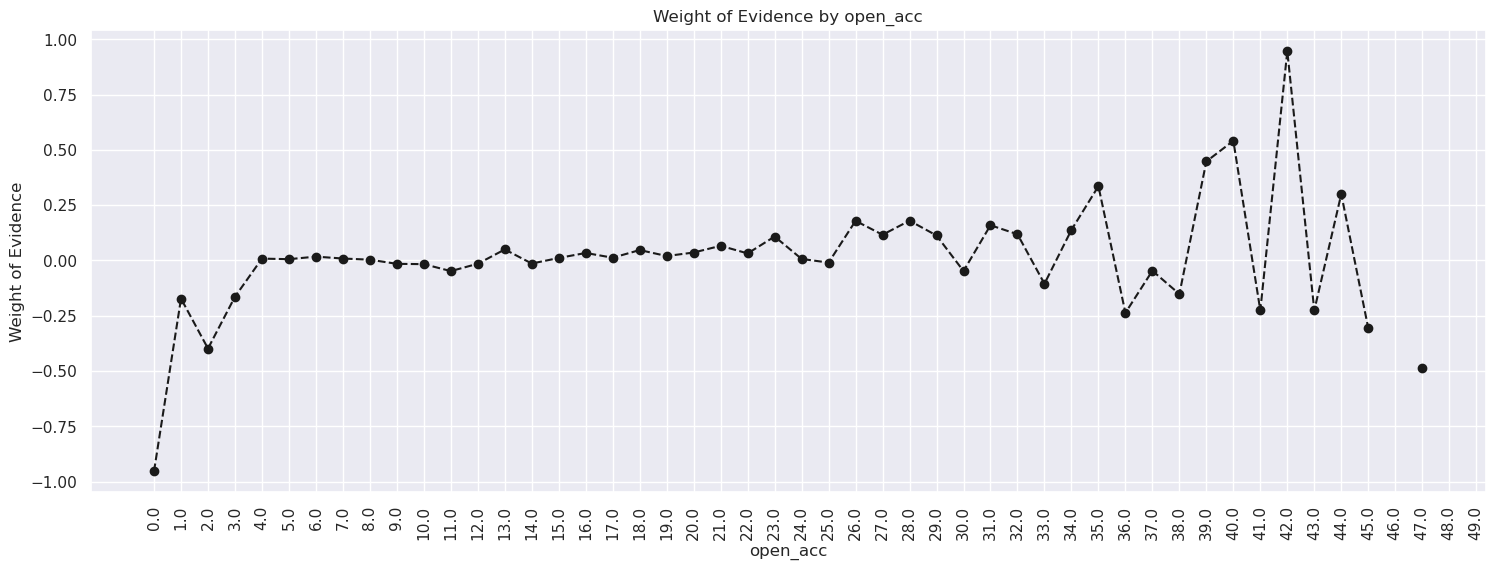

In [131]:
plot_by_woe(df_temp, 90)

In [132]:
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [133]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "pub_rec", df_targets_prepr)
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,323999,0.889941,0.868565,288340.0,35659.0,0.867840,0.874467,-0.007606,NaN,NaN,inf
1,1.0,42381,0.893419,0.113613,37864.0,4517.0,0.113962,0.110771,0.028408,0.003478,0.036014,inf
2,2.0,4527,0.903247,0.012136,4089.0,438.0,0.012307,0.010741,0.136092,0.009828,0.107684,inf
3,3.0,1280,0.920312,0.003431,1178.0,102.0,0.003546,0.002501,0.348856,0.017065,0.212764,inf
4,4.0,408,0.924020,0.001094,377.0,31.0,0.001135,0.000760,0.400513,0.003707,0.051657,inf
5,5.0,203,0.911330,0.000544,185.0,18.0,0.000557,0.000441,0.232239,0.012690,0.168274,inf
6,6.0,117,0.931624,0.000314,109.0,8.0,0.000328,0.000196,0.514161,0.020294,0.281922,inf
7,7.0,48,0.958333,0.000129,46.0,2.0,0.000138,0.000049,1.037749,0.026709,0.523588,inf
8,8.0,24,1.000000,0.000064,24.0,0.0,0.000072,0.000000,inf,0.041667,inf,inf
9,9.0,14,0.785714,0.000038,11.0,3.0,0.000033,0.000074,-0.798462,0.214286,inf,inf


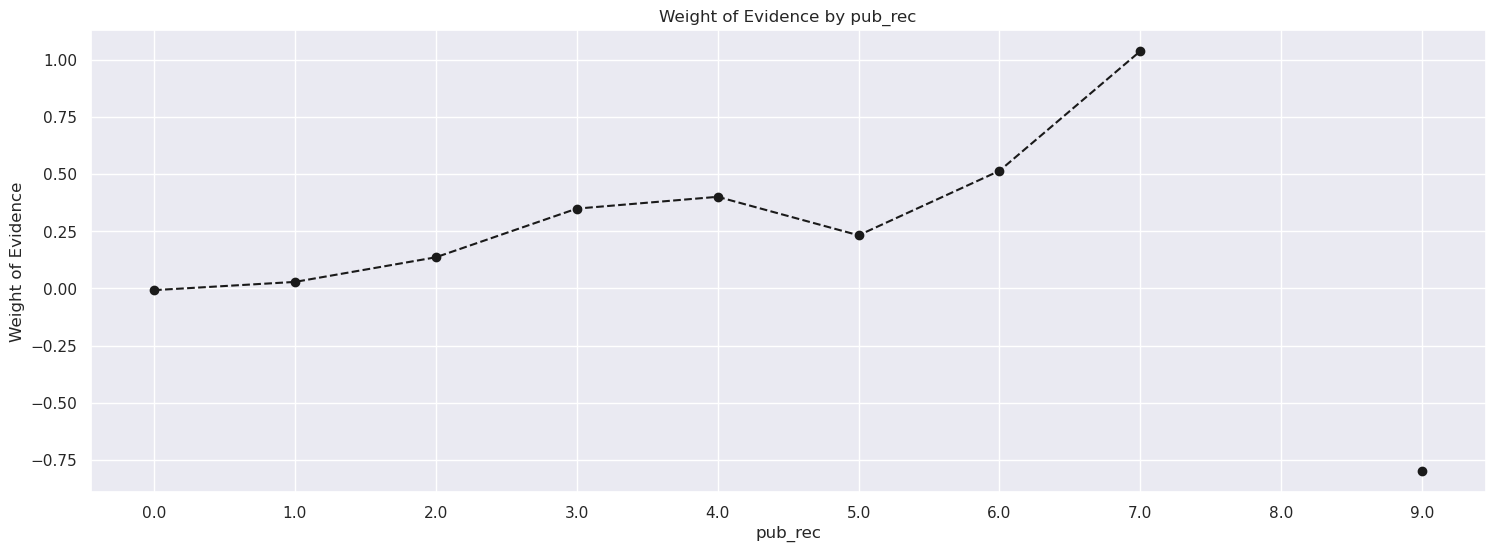

In [134]:
plot_by_woe(df_temp)

In [135]:
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [136]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr, "total_acc", df_targets_prepr)
df_temp

,total_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,24,0.875000,0.000064,21.0,3.0,0.000063,0.000074,-0.151835,NaN,NaN,inf
1,1.0,16,0.812500,0.000043,13.0,3.0,0.000039,0.000074,-0.631408,0.062500,0.479573,inf
2,2.0,54,0.759259,0.000145,41.0,13.0,0.000123,0.000319,-0.949122,0.053241,0.317714,inf
3,3.0,365,0.813699,0.000978,297.0,68.0,0.000894,0.001668,-0.623521,0.054439,0.325602,inf
4,4.0,1219,0.850697,0.003268,1037.0,182.0,0.003121,0.004463,-0.357664,0.036999,0.265856,inf
5,5.0,1905,0.860367,0.005107,1639.0,266.0,0.004933,0.006523,-0.279400,0.009670,0.078265,inf
6,6.0,2880,0.873611,0.007721,2516.0,364.0,0.007573,0.008926,-0.164473,0.013244,0.114926,inf
7,7.0,3892,0.872816,0.010434,3397.0,495.0,0.010224,0.012139,-0.171655,0.000795,0.007182,inf
8,8.0,5064,0.869076,0.013575,4401.0,663.0,0.013246,0.016259,-0.204933,0.003740,0.033278,inf
9,9.0,6091,0.876703,0.016329,5340.0,751.0,0.016072,0.018417,-0.136170,0.007628,0.068763,inf


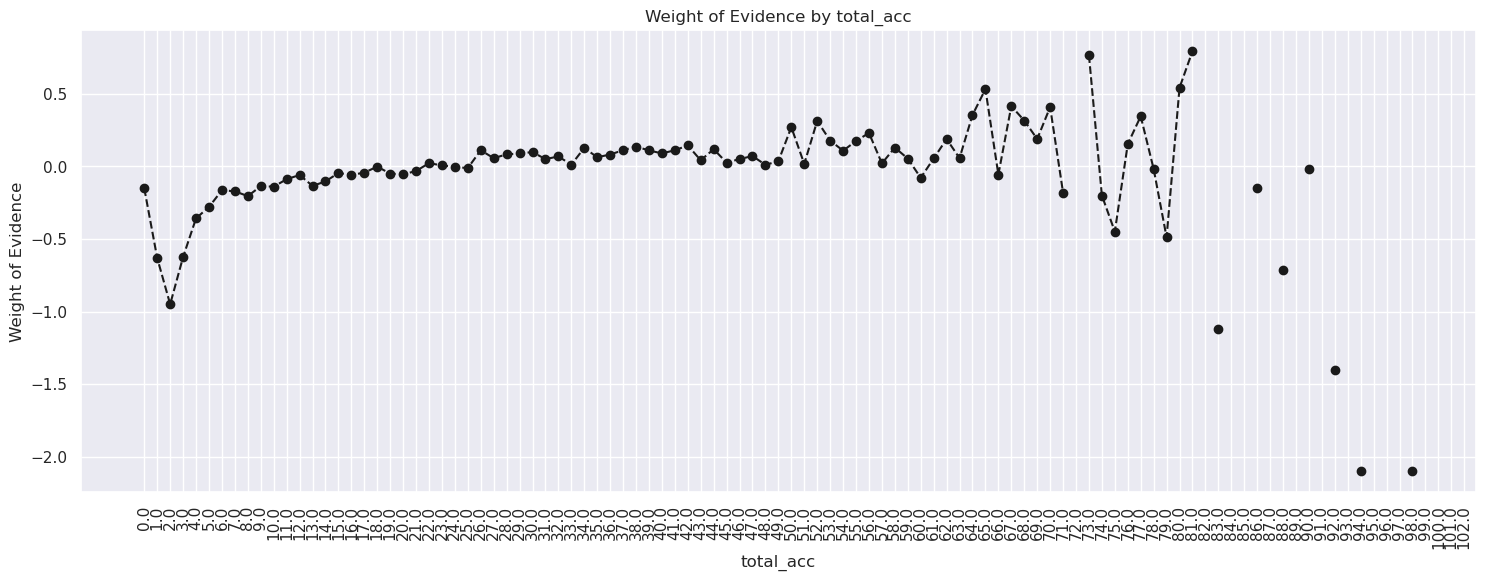

In [138]:
plot_by_woe(df_temp, 90)

In [139]:
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [140]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "acc_now_delinq", df_targets_prepr)
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,371682,0.890648,0.996392,331038.0,40644.0,0.996352,0.996714,-0.000363,NaN,NaN,inf
1,1.0,1263,0.899446,0.003386,1136.0,127.0,0.003419,0.003114,0.093337,0.008797,0.093700,inf
2,2.0,70,0.928571,0.000188,65.0,5.0,0.000196,0.000123,0.467204,0.029126,0.373868,inf
3,3.0,7,0.857143,0.000019,6.0,1.0,0.000018,0.000025,-0.305986,0.071429,0.773190,inf
4,4.0,4,1.000000,0.000011,4.0,0.0,0.000012,0.000000,inf,0.142857,inf,inf
5,5.0,2,0.500000,0.000005,1.0,1.0,0.000003,0.000025,-2.097745,0.500000,inf,inf


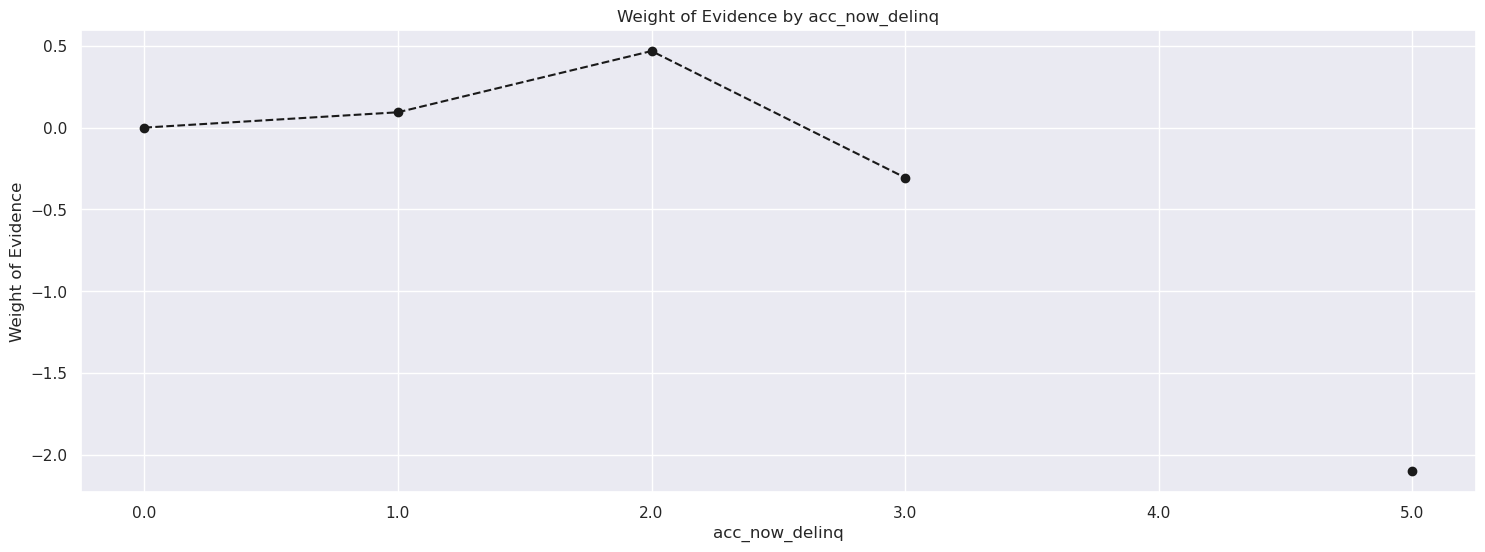

In [141]:
plot_by_woe(df_temp)

In [142]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [143]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

/tmp/ipykernel_31198/2353512927.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_31198/2353512927.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = "columns")
/home/danny/miniconda3/envs/dask/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",19417,0.866457,0.052052,16824.0,2593.0,0.050637,0.063588,-0.227754,NaN,NaN,inf
1,"(5000.0, 9999.999]",52655,0.876194,0.141156,46136.0,6519.0,0.138859,0.159866,-0.140872,0.009737,0.086882,inf
2,"(9999.999, 14999.998]",59570,0.880376,0.159693,52444.0,7126.0,0.157845,0.174751,-0.101749,0.004182,0.039123,inf
3,"(14999.998, 19999.998]",51455,0.877582,0.137939,45156.0,6299.0,0.135910,0.154471,-0.128013,0.002794,0.026264,inf
4,"(19999.998, 24999.997]",41582,0.885792,0.111472,36833.0,4749.0,0.110859,0.116460,-0.049285,0.008210,0.078728,inf
5,"(24999.997, 29999.997]",32093,0.889415,0.086034,28544.0,3549.0,0.085911,0.087032,-0.012964,0.003623,0.036321,inf
6,"(29999.997, 34999.996]",24516,0.894885,0.065722,21939.0,2577.0,0.066032,0.063196,0.043895,0.005470,0.056859,inf
7,"(34999.996, 39999.996]",19767,0.903374,0.052991,17857.0,1910.0,0.053746,0.046839,0.137547,0.008489,0.093652,inf
8,"(39999.996, 44999.996]",14719,0.914396,0.039458,13459.0,1260.0,0.040509,0.030899,0.270791,0.011022,0.133244,inf
9,"(44999.996, 49999.995]",11585,0.911869,0.031057,10564.0,1021.0,0.031795,0.025038,0.238924,0.002528,0.031867,inf


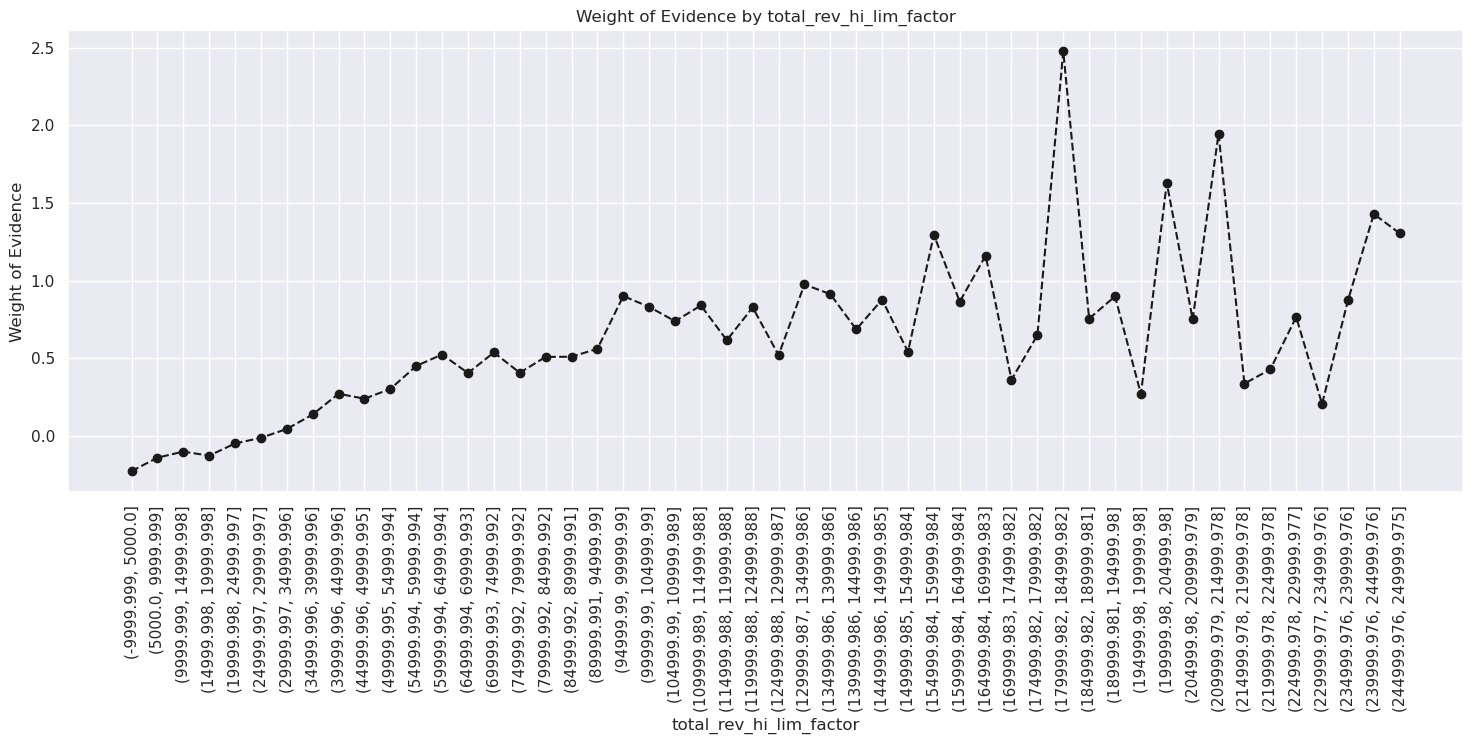

In [144]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [145]:
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [146]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

/tmp/ipykernel_31198/2353512927.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_31198/2353512927.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = "columns")


,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.276, 43.556]",1812,0.906181,0.004858,1642.0,170.0,0.004942,0.004169,0.170127,NaN,NaN,0.013497
1,"(43.556, 71.443]",4841,0.897542,0.012978,4345.0,496.0,0.013078,0.012163,0.072460,0.008639,0.097667,0.013497
2,"(71.443, 99.329]",6824,0.893025,0.018294,6094.0,730.0,0.018342,0.017902,0.024270,0.004517,0.048190,0.013497
3,"(99.329, 127.216]",9138,0.890348,0.024497,8136.0,1002.0,0.024488,0.024572,-0.003444,0.002677,0.027715,0.013497
4,"(127.216, 155.102]",10040,0.896514,0.026915,9001.0,1039.0,0.027091,0.025479,0.061332,0.006166,0.064776,0.013497
5,"(155.102, 182.988]",16816,0.894208,0.045080,15037.0,1779.0,0.045258,0.043626,0.036717,0.002306,0.024615,0.013497
6,"(182.988, 210.875]",17216,0.904798,0.046152,15577.0,1639.0,0.046883,0.040193,0.153964,0.010590,0.117247,0.013497
7,"(210.875, 238.761]",15090,0.900398,0.040453,13587.0,1503.0,0.040894,0.036858,0.103905,0.004400,0.050059,0.013497
8,"(238.761, 266.648]",18842,0.901391,0.050511,16984.0,1858.0,0.051118,0.045564,0.115026,0.000993,0.011121,0.013497
9,"(266.648, 294.534]",20100,0.891095,0.053883,17911.0,2189.0,0.053908,0.053681,0.004225,0.010296,0.110801,0.013497


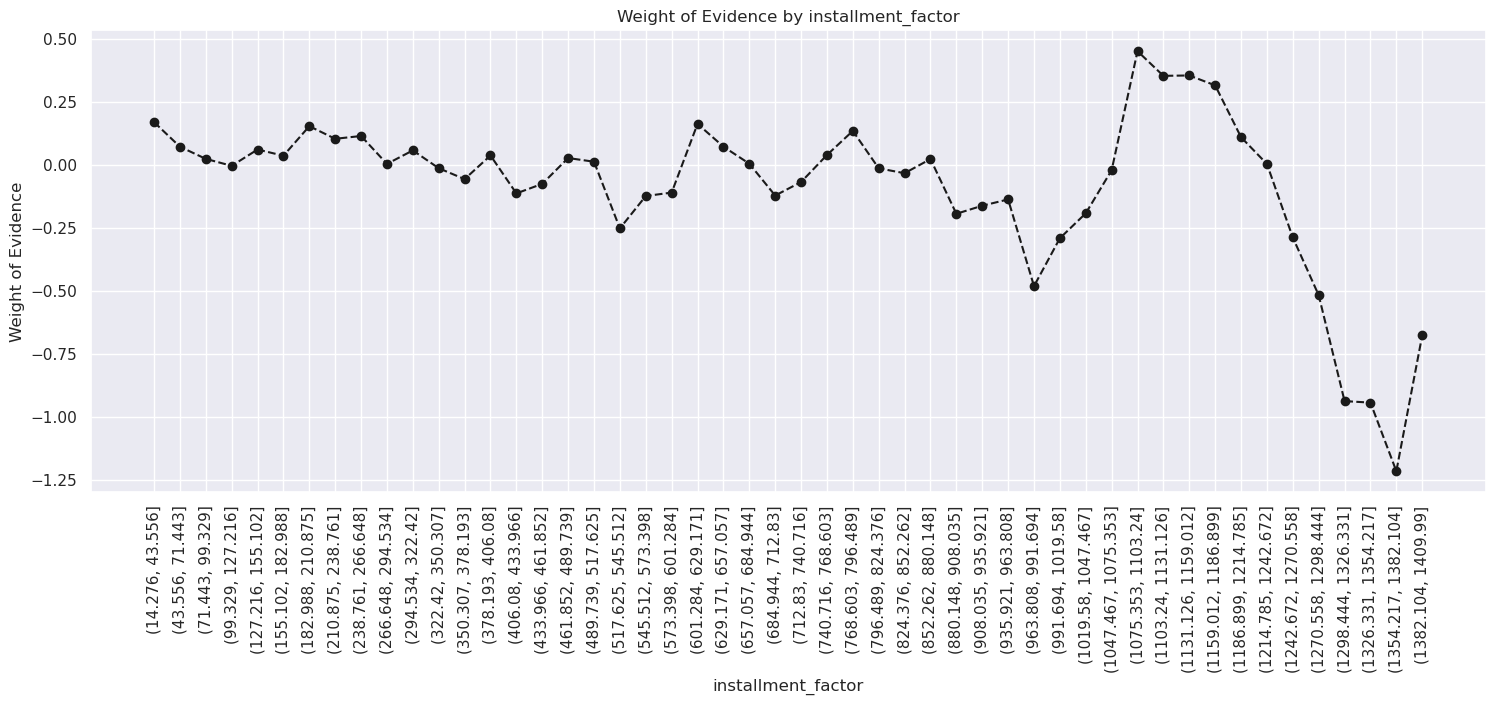

In [147]:
plot_by_woe(df_temp, 90)